In [2]:
import os
import sys
import matplotlib.pyplot as plt

# Añadir el directorio de la otra carpeta al path
sys.path.append('/Users/marcosgonzalez/Desktop/Circu/Circulacion-General-FCEN/modulo_oceano')

# Ahora puedes importar las funciones
from funciones.cargar_salida_QG import *

In [6]:
# Directorios de salida para cada modelo
dir_salidas = {
    "S1": "/Users/marcosgonzalez/Desktop/Circu/Practica 1/out_tmp_S1/",
    "S2": "/Users/marcosgonzalez/Desktop/Circu/Practica 1/out_tmp_S2/",
    "M1": "/Users/marcosgonzalez/Desktop/Circu/Practica 1/out_tmp_M1/",
    "M2": "/Users/marcosgonzalez/Desktop/Circu/Practica 1/out_tmp_M2/"
}

# Dimensiones del modelo
Lx, Ly = 4000, 2000  # Dimensiones de la cuenca en km
nx, ny = 200, 100    # Puntos de grilla


In [7]:
import matplotlib.pyplot as plt

def analizar_spin_up(datos, titulo):
    # Datos[4] corresponde a QG_diag según la estructura de salida de la función cargar
    energias = datos[4][:, 3]  # Asumiendo que la energía cinética está en la cuarta columna
    plt.figure(figsize=(10, 6))
    plt.plot(energias, label='Energía Cinética')
    plt.title(titulo)
    plt.xlabel('Tiempo')
    plt.ylabel('Energía Cinética')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Establecer un criterio para determinar la estabilización
    umbral = 0.01  # 1% de cambio
    iteraciones_estables = 0
    for i in range(1, len(energias)):
        if abs((energias[i] - energias[i-1]) / energias[i-1]) < umbral:
            iteraciones_estables += 1
        else:
            iteraciones_estables = 0  # Reiniciar si el cambio es mayor que el umbral
        if iteraciones_estables >= 10:  # Número consecutivo de iteraciones estables
            print(f"El modelo {titulo} se estabilizó después de {i} iteraciones.")
            break


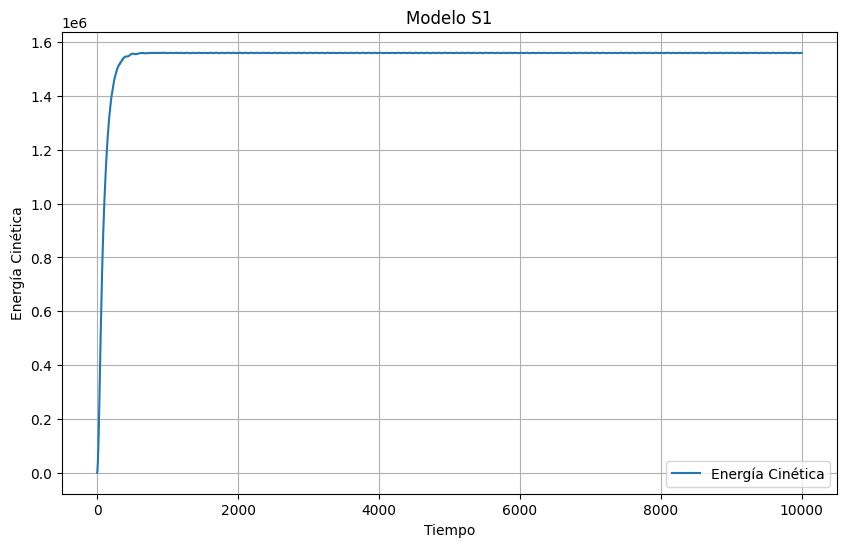

El modelo Modelo S1 se estabilizó después de 92 iteraciones.


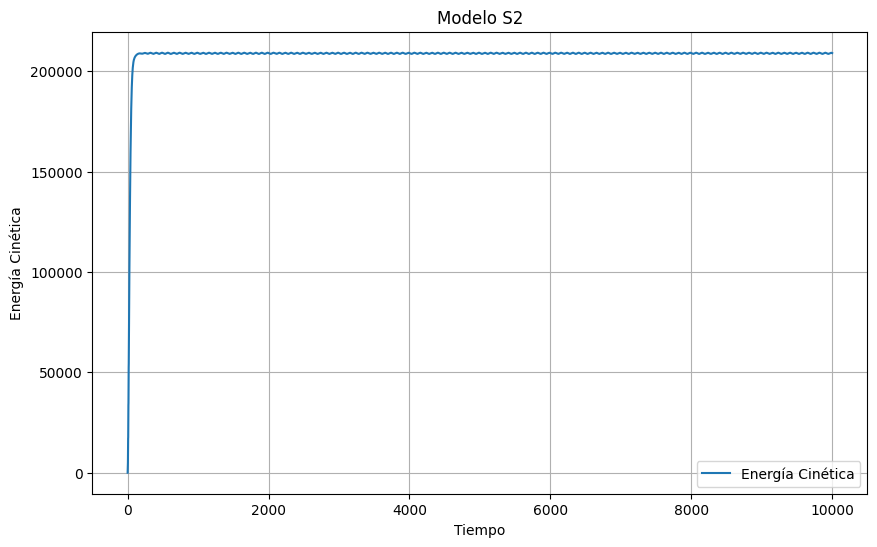

El modelo Modelo S2 se estabilizó después de 60 iteraciones.


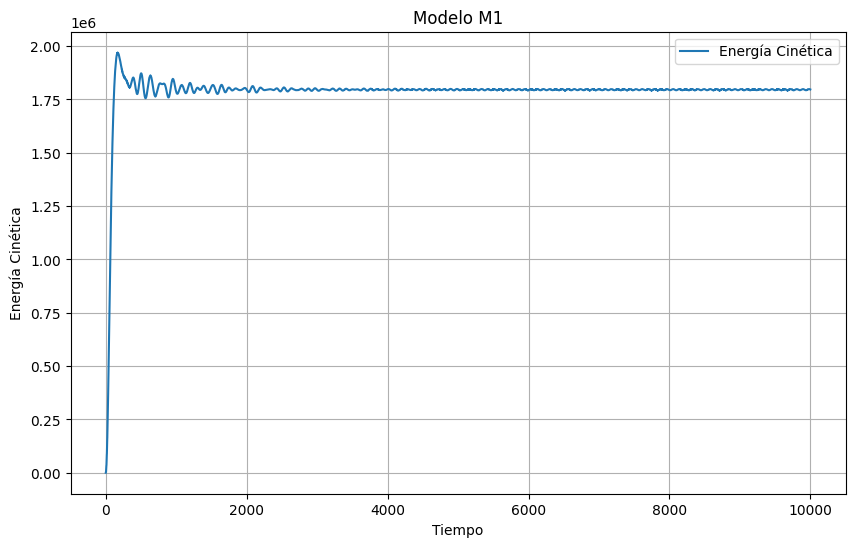

El modelo Modelo M1 se estabilizó después de 99 iteraciones.


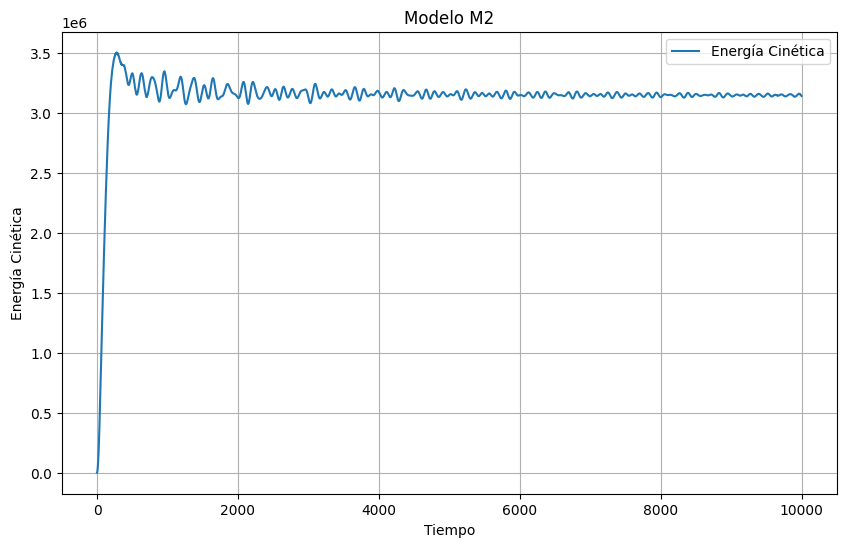

El modelo Modelo M2 se estabilizó después de 117 iteraciones.


In [8]:
# Ejecutar análisis para cada configuración de modelo
for nombre, dir_salida in dir_salidas.items():
    datos_modelo = cargar(dir_salida, Lx, Ly, nx, ny)
    analizar_spin_up(datos_modelo, f"Modelo {nombre}")

In [11]:
import matplotlib.pyplot as plt

def graficar_todas_energias(datos, titulos):
    plt.figure(figsize=(12, 8))
    for i, (data, title) in enumerate(zip(datos, titulos)):
        energias = data[4][:, 3]  # Asumimos que la columna 3 tiene la energía cinética
        plt.plot(energias, label=f'{title}')
    
    plt.title('Evolución de la Energía Cinética en los Modelos')
    plt.xlabel('Iteración')
    plt.ylabel('Energía Cinética')
    plt.legend()
    plt.grid(True)
    plt.show()

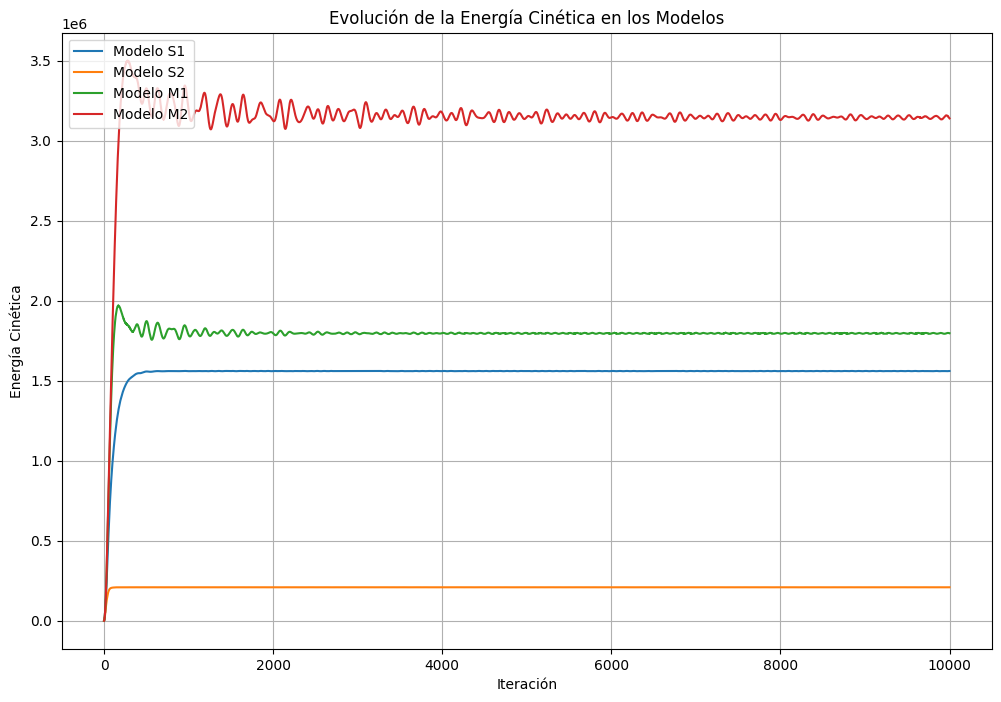

In [12]:
# Directorios de salida para cada modelo
dir_salidas = {
    "S1": "/Users/marcosgonzalez/Desktop/Circu/Practica 1/out_tmp_S1/",
    "S2": "/Users/marcosgonzalez/Desktop/Circu/Practica 1/out_tmp_S2/",
    "M1": "/Users/marcosgonzalez/Desktop/Circu/Practica 1/out_tmp_M1/",
    "M2": "/Users/marcosgonzalez/Desktop/Circu/Practica 1/out_tmp_M2/"
}

# Dimensiones del modelo
Lx, Ly = 4000, 2000  # Dimensiones de la cuenca en km
nx, ny = 200, 100    # Puntos de grilla

# Recopilar datos de cada modelo
datos_modelos = []
titulos = []

for nombre, dir_salida in dir_salidas.items():
    datos = cargar(dir_salida, Lx, Ly, nx, ny)
    datos_modelos.append(datos)
    titulos.append(f"Modelo {nombre}")

# Graficar la evolución de la energía cinética para todos los modelos
graficar_todas_energias(datos_modelos, titulos)